## Import ##

In [57]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from model_profiler import model_profiler
from pathlib import Path
import json
import pandas as pd

batch_size = 100
epoch_size = 5000
test_len = 8

In [58]:
def flatten(l):
    return [item for sublist in l for item in sublist]


def get_txt_data(path: Path) -> np.ndarray:
    with path.open("r", encoding="utf-8") as f:
        result: list = json.loads(f.readline())
        return np.array(flatten(result))


input_data: np.ndarray = np.load('data/train_input.npy')
output_data: np.ndarray = np.load('data/train_output.npy')
input_shape = input_data.shape[1:]
output_shape = output_data.shape[1:]

print('input shape')
print(input_shape)
print()
print('output shape')
print(output_shape)


def load_data():
    l = len(input_data)
    last = l - 1
    first = int(l-l/test_len)
    train_images = input_data[0:first]
    train_labels = output_data[0:first]

    test_images = input_data[first:last]
    test_labels = output_data[first:last]
    print('Train shape: {}'.format(train_images.shape))
    print('Test shape: {}'.format(test_images.shape))

    return (train_images, train_labels), (test_images, test_labels)


input shape
(79, 53)

output shape
(66,)


In [59]:
(train_images, train_labels), (test_images, test_labels) = load_data()
input_shape = train_images.shape[1:3]


Train shape: (12959, 79, 53)
Test shape: (1851, 79, 53)


In [60]:
print(np.prod(input_shape))

normalization = tf.keras.layers.Normalization(axis=None)
normalization.adapt([0,255.0])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(input_shape))
model.add(normalization)
model.add(tf.keras.layers.Conv1D(16, 32, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, 'relu'))
model.add(tf.keras.layers.Dense(512, 'relu'))
model.add(tf.keras.layers.Dense(66))

model.summary()


4187
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 79, 53)           3         
 ion)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 48, 16)            27152     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 24, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 22, 32)            1568      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 11, 32)           0         
 g1D)                                                            
                                                 

In [61]:
# profile = model_profiler(model, batch_size)

# print(profile)


In [62]:
model.compile(optimizer='adam',
              loss="mae",)

history = model.fit(
    train_images, train_labels,
    epochs=epoch_size,
    batch_size=batch_size,
    validation_data=(test_images, test_labels)
)


Epoch 1/5000
130/130 [==============================] - 1s 5ms/step - loss: 149.2164 - val_loss: 100.2937
Epoch 2/5000
130/130 [==============================] - 0s 3ms/step - loss: 97.6525 - val_loss: 99.0839
Epoch 3/5000
130/130 [==============================] - 0s 3ms/step - loss: 93.2355 - val_loss: 86.3090
Epoch 4/5000
130/130 [==============================] - 0s 3ms/step - loss: 79.0392 - val_loss: 78.5973
Epoch 5/5000
130/130 [==============================] - 0s 3ms/step - loss: 71.3606 - val_loss: 71.1473
Epoch 6/5000
130/130 [==============================] - 0s 3ms/step - loss: 64.0295 - val_loss: 63.8009
Epoch 7/5000
130/130 [==============================] - 0s 3ms/step - loss: 58.9984 - val_loss: 62.0738
Epoch 8/5000
130/130 [==============================] - 0s 3ms/step - loss: 54.8592 - val_loss: 57.2589
Epoch 9/5000
130/130 [==============================] - 0s 3ms/step - loss: 51.0762 - val_loss: 53.5739
Epoch 10/5000
130/130 [==============================] - 0s 3m

In [63]:
history: dict = history.history
loss = history['loss']
val_loss = history['val_loss']
l = int(len(loss) / 10)
history['loss'] = loss[l:]
history['val_loss'] = val_loss[l:]


{'loss': [6.6400861740112305, 5.917721271514893, 5.525016784667969, 5.306939601898193, 5.255731582641602, 6.605935573577881, 5.572127342224121, 5.179205894470215, 5.148143768310547, 5.530668258666992, 6.413484573364258, 5.233641147613525, 6.1138715744018555, 5.314975261688232, 5.25469970703125, 5.139007091522217, 6.338382244110107, 5.216129302978516, 5.641861915588379, 6.416006565093994, 5.399691581726074, 6.595748424530029, 5.026231288909912, 6.268773555755615, 5.098152160644531, 5.021270275115967, 5.138081073760986, 5.225157737731934, 5.842098712921143, 5.173890590667725, 5.262383937835693, 5.46059513092041, 5.153259754180908, 5.4107465744018555, 5.0243611335754395, 5.230370998382568, 5.169234275817871, 5.148021697998047, 5.27774715423584, 5.241308689117432, 5.546324729919434, 5.951218605041504, 4.978569030761719, 5.0241241455078125, 5.151165008544922, 5.032095432281494, 5.018085479736328, 4.940108776092529, 5.064133167266846, 5.353620529174805, 5.807498455047607, 4.925978660583496, 

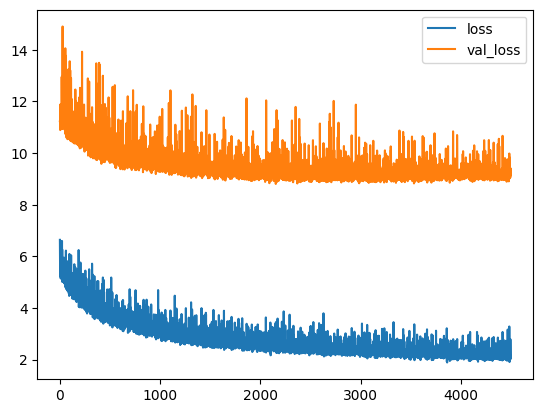

In [64]:

print(history)
history_df = pd.DataFrame(history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [65]:
# print(test_acc)

# cuda.select_device(0)
# cuda.close()


In [66]:
model.save('out')

INFO:tensorflow:Assets written to: out\assets


INFO:tensorflow:Assets written to: out\assets
